In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [5]:
df = pd.read_csv("data/FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

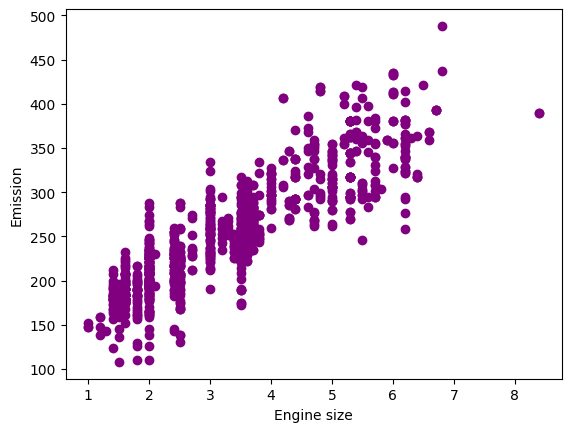

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='purple')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [12]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
print(f'Coefficients: {clf.coef_}')
print(f'Intercept: {clf.intercept_}')

Coefficients: [[ 0.         50.04194564 -1.33908334]]
Intercept: [107.16303823]


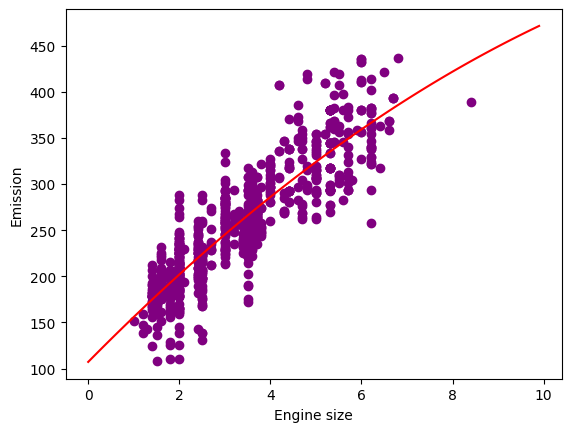

In [15]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')
x_squared = np.arange(0.0, 10.0, 0.1)
y_squared = clf.intercept_[0] + clf.coef_[0][1]*x_squared + clf.coef_[0][2]*np.power(x_squared, 2)
plt.plot(x_squared, y_squared, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [20]:
def mean_absolute_error(y, y_hat):
    return np.mean(np.abs(y - y_hat))

def residual_sum_of_squares(y, y_hat):
    return np.mean(np.square(y - y_hat))

In [21]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f'Mean absolute error: {mean_absolute_error(test_y,test_y_):.2f}')
print(f'Residual sum of squares (MSE): {residual_sum_of_squares(test_y,test_y_):.2f}')
print(f'R2-score: {r2_score(test_y,test_y_):.2f}')

Mean absolute error: 24.34
Residual sum of squares (MSE): 1062.17
R2-score: 0.72


In [23]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

print(f'Coefficients: {clf3.coef_}')
print(f'Intercept: {clf3.intercept_}')

train_x_poly3

Coefficients: [[ 0.         28.24891127  4.78006635 -0.51865509]]
Intercept: [129.96607494]


array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

Mean absolute error: 24.21
Residual sum of squares (MSE): 1054.67
R2-score: 0.72


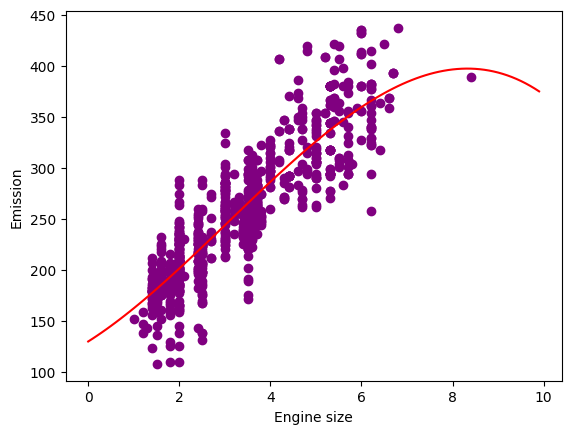

In [24]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='purple')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0] + clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)

plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

print(f"Mean absolute error: {mean_absolute_error(test_y,test_y3_):.2f}")
print(f"Residual sum of squares (MSE): {residual_sum_of_squares(test_y,test_y3_):.2f}")
print(f"R2-score: {r2_score(test_y,test_y3_):.2f}")